In [34]:
words = open("names.txt", "r").read().splitlines()

In [35]:
import torch
import string

In [36]:
N = torch.ones((27*27, 27), dtype = torch.int32)

letters = string.ascii_lowercase
start_dots = ['.' + letter for letter in letters]
middle_combinations = [a + b for a in letters for b in letters]
end_dots = [letter + '.' for letter in letters]
chars = start_dots + middle_combinations + end_dots
chars = sorted(list(set(chars)))
bigram_itos = {index + 1: value for index, value in enumerate(chars)}
bigram_stoi = {value: index + 1 for index, value in enumerate(chars)}
bigram_itos[0] = ".."
bigram_stoi[".."] = 0

chars = sorted(list(set(''.join(words))))

itos = {index+1: value for index, value in enumerate(chars)}
stoi = {value: index+1 for index, value in enumerate(chars)}

itos[0] = '.'
stoi['.'] = 0

In [37]:
for word in words:
    chars = ['.'] + list(word) + ['.']
    for i in range(len(chars) - 2):
        bigram = ''.join([chars[i], chars[i+1]])
        next = chars[i+2]
        N[bigram_stoi[bigram], stoi[next]] += 1
N

tensor([[  1,   1,   1,  ...,   1,   1,   1],
        [  1, 208, 191,  ...,  28, 174, 153],
        [  1, 170,   1,  ...,   1,   5,   1],
        ...,
        [  2,   1,   1,  ...,   1,   1,   1],
        [ 35,  28,   1,  ...,   1,   1,   2],
        [  5,  14,   1,  ...,   1,   8,   1]], dtype=torch.int32)

In [15]:
N.shape

torch.Size([729, 27])

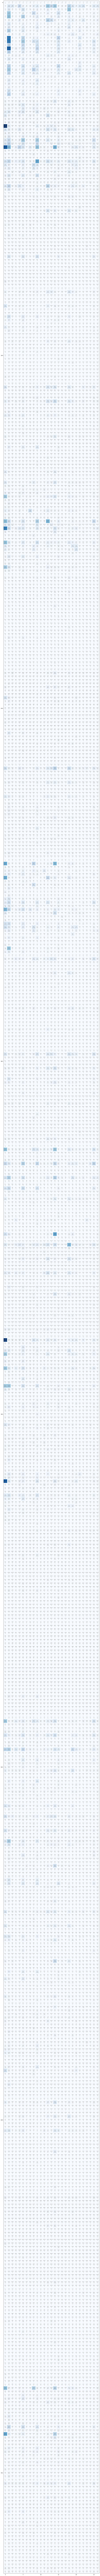

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16*27)) # increases size of the figure
plt.imshow(N[:27*27], cmap='Blues')
for i in range(27*27):
    for j in range(27):
        char = bigram_itos[i] + itos[j]
        plt.text(j, i, char, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

In [46]:
P = (N).float()
P /= torch.sum(P, 1, keepdim=True)
g = torch.Generator().manual_seed(2147483647)

In [47]:
for i in range(30):
    word = ['.a']
    ix = bigram_stoi['.a']
    while True:
        p = P[ix]
        next = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        nextChar = itos[next]
        word.append(nextChar)
        if nextChar == '.':
            break
        currentBigram = bigram_itos[ix]
        ix = bigram_stoi[''.join([currentBigram[1:], nextChar])]
    print(''.join(word))

.adexza.
.alealius.
.arleikaydnevonimittain.
.allayk.
.aka.
.ada.
.arleighubrahsimilton.
.amoriellavojkwuthda.
.akaley.
.am.
.aside.
.ahniaviyah.
.altbspihiliven.
.atahlasuzusfxx.
.aleenlen.
.ann.
.aisan.
.air.
.azen.
.alee.
.ake.
.ader.
.ad.
.air.
.at.
.arcielle.
.alabelarl.
.amiya.
.aqeven.
.arix.


In [57]:
logSum = 0
n = 0

for w in words:
    chars = ['.'] + list(w) + ['.']
    for i in range(len(chars) - 2):
        bigram = ''.join([chars[i], chars[i+1]])
        next = chars[i+2]
        bigram_index = bigram_stoi[bigram]
        index = stoi[next]
        prob = P[bigram_index, index]
        logProb = torch.log(prob)
        logSum += logProb
        n += 1

print(f'{logSum=}')
negativeLogSum = -logSum
print(f'{negativeLogSum=}')
print(f'{negativeLogSum/n:.4f}')

logSum=tensor(-410414.9688)
negativeLogSum=tensor(410414.9688)
2.0927


In [ ]:
for word in words:
    chars = ['.'] + list(word) + ['.']
    for i in range(len(chars) - 2):
        bigram = ''.join([chars[i], chars[i+1]])
        next = chars[i+2]
        N[bigram_stoi[bigram], stoi[next]] += 1
N